<a href="https://colab.research.google.com/github/yrb1802/Food_Delivery_Time_Prediction./blob/main/Food_delivery_time_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Knowing the Data**

In [76]:

# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [77]:
df= pd.read_csv('/content/drive/MyDrive/ML Project Datasets/Food_Delivery_Times.csv')

In [78]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [79]:
df.tail()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55
999,103,6.63,Foggy,Low,Night,Scooter,24,3.0,58


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [81]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [82]:
# Shape of dataset-

print(f"Number of columns: {df.shape[1]} & Number of rows: {df.shape[0]}")

Number of columns: 9 & Number of rows: 1000


In [83]:
# columns-

df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

# **EDA- Exploratory Data Analysis**

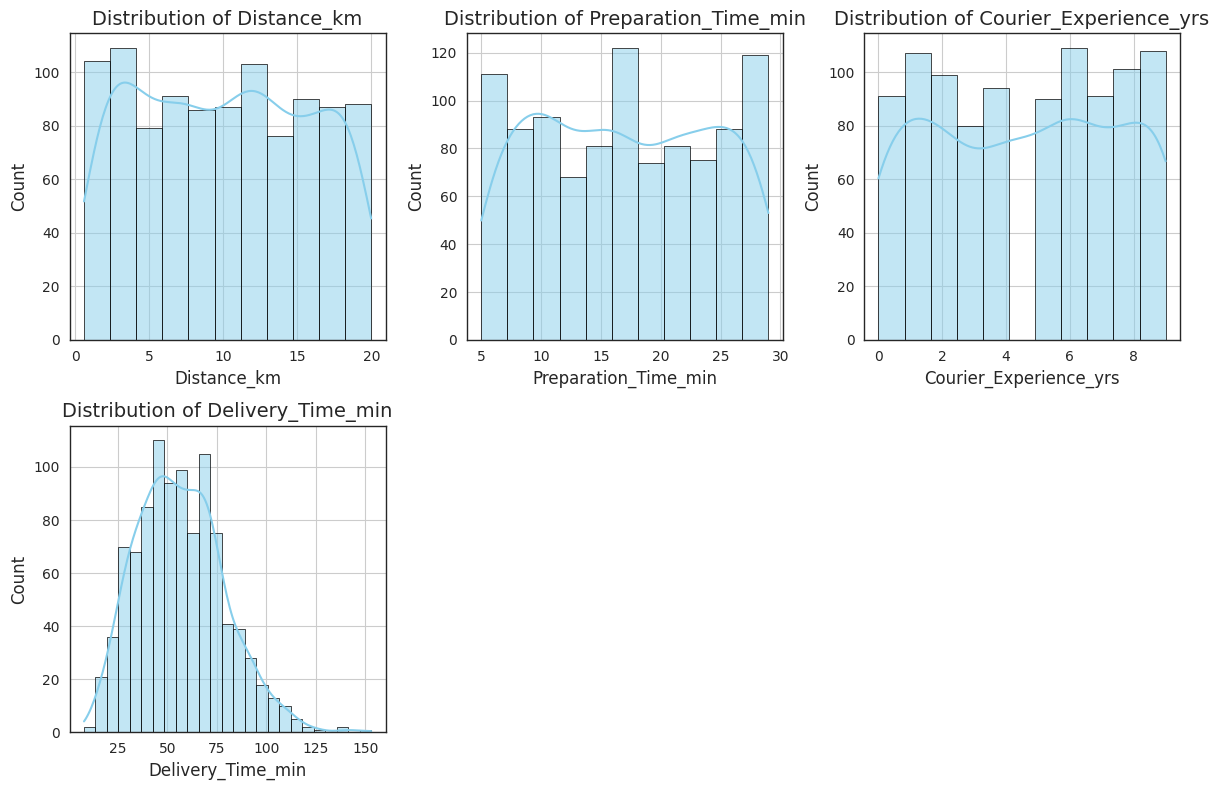

In [84]:
# Chart 1- Distribution of Numerical Columns-

# List of numerical columns
numerical_columns = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

# Set up the plot grid
plt.figure(figsize=(12, 8))

# Loop through numerical columns to plot their distributions
for i in range(len(numerical_columns)):
    plt.subplot(2, 3, i+1)  # Start at index 1
    sns.histplot(df[numerical_columns[i]], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {numerical_columns[i]}', fontsize=14)
    plt.grid(True)

plt.tight_layout()
plt.show()



*   All the numerical features are balanced.

<ipython-input-85-7f6c09a92aef>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_columns[i], data=df, palette='coolwarm', edgecolor='black')
<ipython-input-85-7f6c09a92aef>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_columns[i], data=df, palette='coolwarm', edgecolor='black')
<ipython-input-85-7f6c09a92aef>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=categorical_columns[i], data=df, palette='coolwarm', edgecolor='black')
<ipython-input-85-7f6c09a92aef>:12: FutureWarning: 

Passing `palette` wi

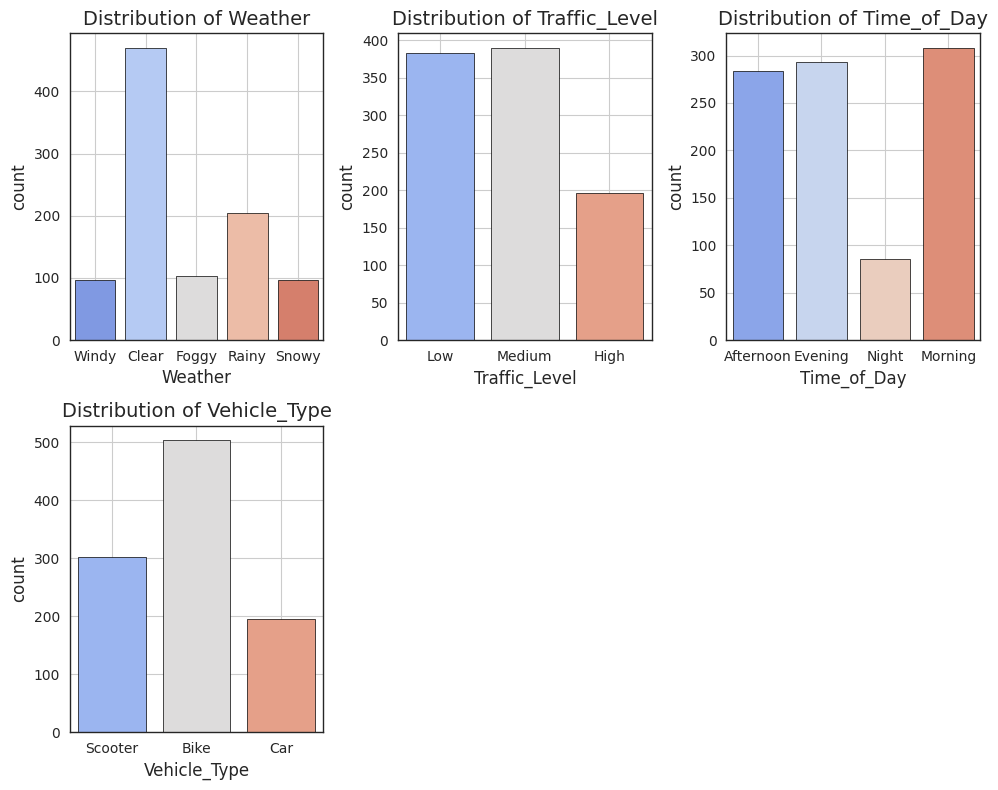

In [85]:
# Chart 2- Distribution of Categorical Columns-

# List of categorical columns
categorical_columns = ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']

# Set up the plot grid
plt.figure(figsize=(10, 8))

# Loop through categorical columns to plot their distributions
for i in range(len(categorical_columns)):
    plt.subplot(2, 3, i+1)  # Start at index 1
    sns.countplot(x=categorical_columns[i], data=df, palette='coolwarm', edgecolor='black')
    plt.title(f'Distribution of {categorical_columns[i]}', fontsize=14)
    plt.grid(True)

plt.tight_layout()
plt.show()

<ipython-input-86-cd6bf1593c82>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_delivery_time.index, y=weather_delivery_time.values, palette='Set3')


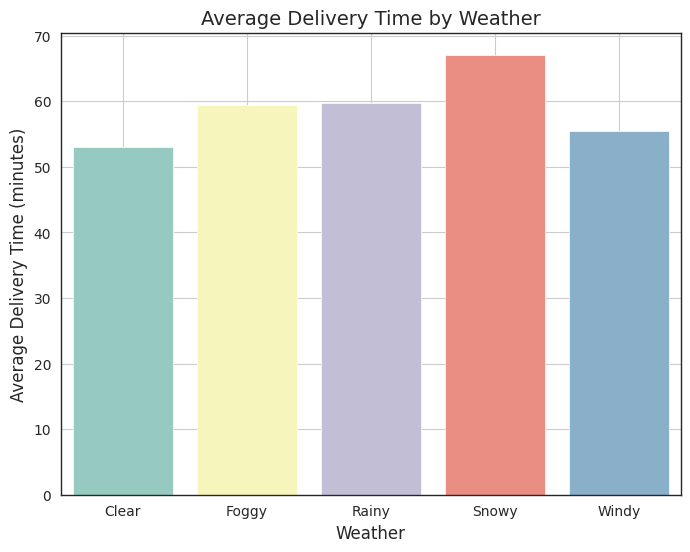

In [86]:
# Chart 3- Delivery_Time v/s Weather-

weather_delivery_time = df.groupby('Weather')['Delivery_Time_min'].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=weather_delivery_time.index, y=weather_delivery_time.values, palette='Set3')
plt.title('Average Delivery Time by Weather', fontsize=14)
plt.xlabel('Weather', fontsize=12)
plt.ylabel('Average Delivery Time (minutes)', fontsize=12)
plt.grid(True)
plt.show()

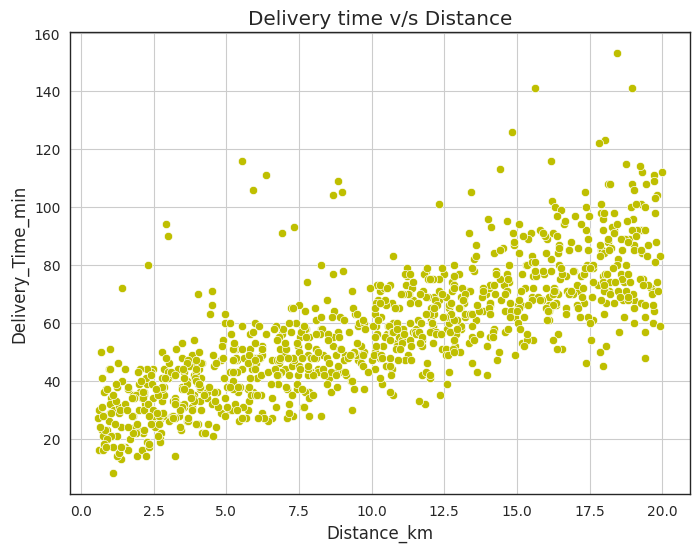

In [87]:
# Chart 4- Delivery time v/s Distance-

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Distance_km',y='Delivery_Time_min', color='y')
plt.title("Delivery time v/s Distance")
plt.grid(True)
plt.show()

<ipython-input-88-e90711b070d7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=traffic_delivery_time.index,y=traffic_delivery_time.values, palette='coolwarm_r')


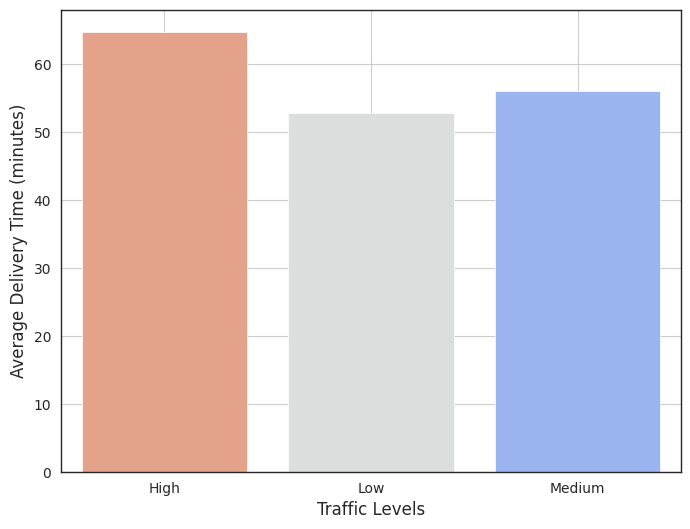

In [88]:
# Chart 5- Delivery Time v/s Traffic Level-

traffic_delivery_time= df.groupby('Traffic_Level')['Delivery_Time_min'].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=traffic_delivery_time.index,y=traffic_delivery_time.values, palette='coolwarm_r')
plt.xlabel('Traffic Levels', fontsize=12)
plt.ylabel('Average Delivery Time (minutes)', fontsize=12)
plt.grid(True)
plt.show()

In [89]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

<ipython-input-90-cd706b5b7497>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_delivery_time.index,y=vehicle_delivery_time.values, palette='coolwarm_r')


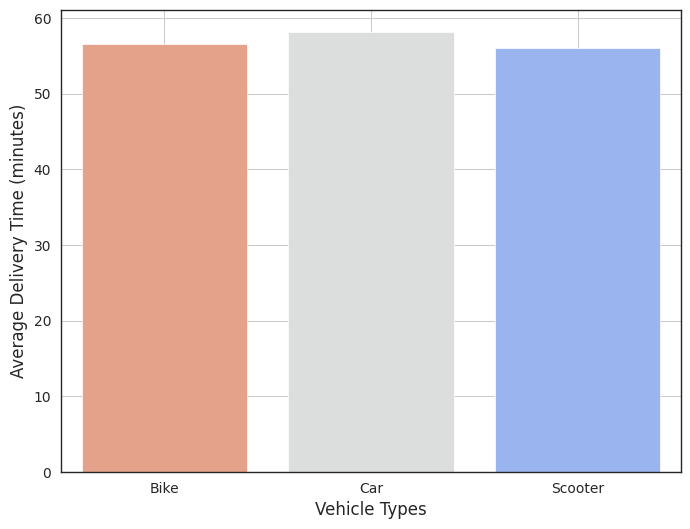

In [90]:
# Chart 6- Delivery Time by Vehicle Type-

vehicle_delivery_time= df.groupby('Vehicle_Type')['Delivery_Time_min'].mean()

plt.figure(figsize=(8,6))
sns.barplot(x=vehicle_delivery_time.index,y=vehicle_delivery_time.values, palette='coolwarm_r')
plt.xlabel('Vehicle Types', fontsize=12)
plt.ylabel('Average Delivery Time (minutes)', fontsize=12)
plt.grid(True)
plt.show()


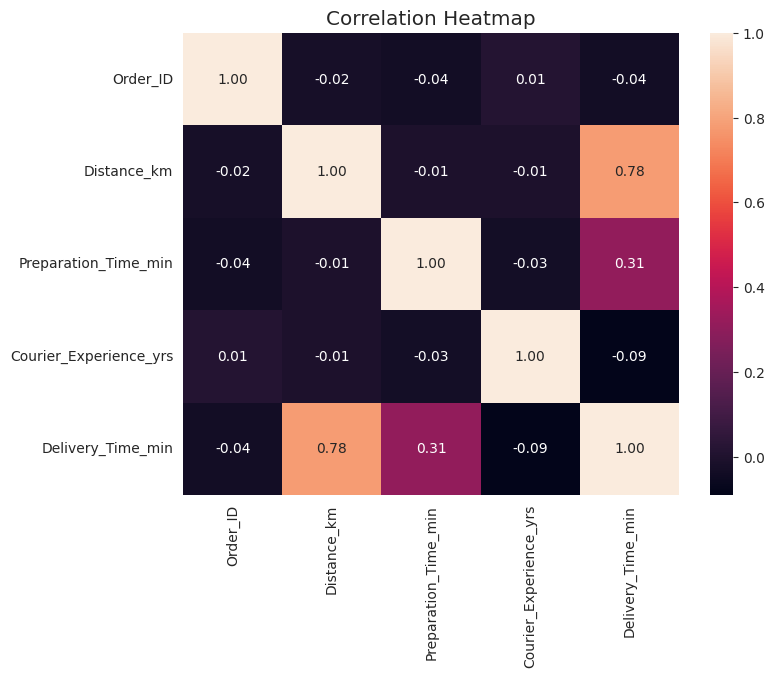

In [91]:
# Chart 7- Correlation Heatmap-

numerical_df= df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# **Data-Wrangling**

In [92]:
# Checking type of values in each categorical columns-

for col in df.select_dtypes(include=['object','category']).columns:
  print(f"Column: {col}")
  print(df[col].unique())
  print("--"*20)

Column: Weather
['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy' nan]
----------------------------------------
Column: Traffic_Level
['Low' 'Medium' 'High' nan]
----------------------------------------
Column: Time_of_Day
['Afternoon' 'Evening' 'Night' 'Morning' nan]
----------------------------------------
Column: Vehicle_Type
['Scooter' 'Bike' 'Car']
----------------------------------------




*   We can see there are some Nan values in columns "Weather", "Traffic_level" & "Time_of_Day".


In [93]:
# Checking missing values-
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [94]:
# Handling missing values-

# In columns "Weather","Traffic_Level","Time_of_Day" - since they are categorical features we will use mode imputation-

df['Weather']= df['Weather'].fillna(df['Weather'].mode()[0])
df['Traffic_Level']= df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day']= df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

# In column "Courier_Experience_yrs" - since it is a numerical(continous) feature we will use mean imputation-

df['Courier_Experience_yrs']= df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mean())

In [95]:
# Rechecking missing values-

df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0




*   Now we have 0 null values throughout the dataset.




In [96]:
# Checking for outliers-

from scipy.stats import zscore

# Selecting only numerical columns
numerical_cols = ['Distance_km', 'Preparation_Time_min', 'Courier_Experience_yrs', 'Delivery_Time_min']

# Compute absolute Z-scores
z_scores = np.abs(zscore(df[numerical_cols]))

# Identify outliers (Z-score > 3)
outliers = (z_scores > 3).sum()

# Print number of outliers per feature
print("Outliers per feature:")
print(outliers)

Outliers per feature:
Distance_km               0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         5
dtype: int64


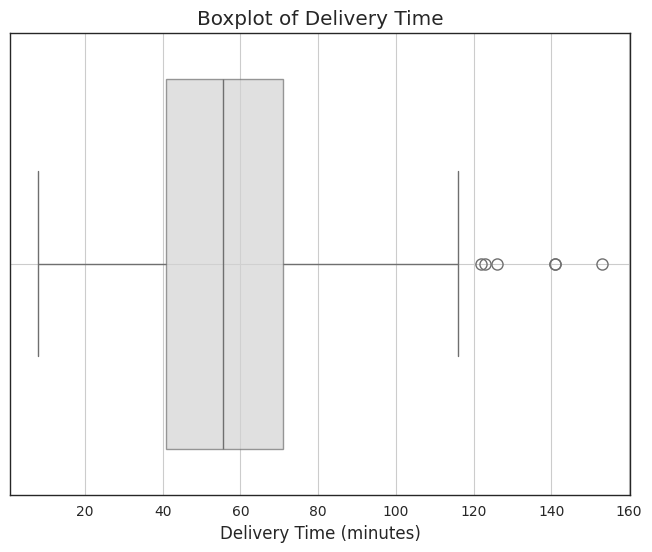

In [97]:
# Lets visualize those outliers-

plt.figure(figsize=(8,6))
sns.boxplot(x=df['Delivery_Time_min'], color='skyblue', fliersize=8, boxprops=dict(facecolor="lightgray", alpha=0.7))
plt.title("Boxplot of Delivery Time")
plt.xlabel("Delivery Time (minutes)")
plt.grid(True)
plt.show()



*   Since the max values in the Delivery_time_min columns is 153 i think its better to leave those 5 outliers as they are valuable for the dataset and they are not some mistake but an actual delivery time value.

## **Feature Engineering**

In [98]:
# Dropping Id column as it adds no value to the model-

df.drop(columns=['Order_ID'], inplace=True)

In [99]:
for col in df.select_dtypes(include=['category','object']).columns:
  print(f"Column: {col}")
  print(df[col].unique())
  print("-"*20)

Column: Weather
['Windy' 'Clear' 'Foggy' 'Rainy' 'Snowy']
--------------------
Column: Traffic_Level
['Low' 'Medium' 'High']
--------------------
Column: Time_of_Day
['Afternoon' 'Evening' 'Night' 'Morning']
--------------------
Column: Vehicle_Type
['Scooter' 'Bike' 'Car']
--------------------


**Categorical Encoding**



In [102]:
# 1) Weather Column using One-Hot-Encoding-

!pip install category_encoders
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['Weather'], use_cat_names=True, drop_invariant=True)
df = encoder.fit_transform(df)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.6 MB/s eta 0:00:00


In [105]:
# 2) Encoding Traffic using mapping as ordinal encoding-

traffic_order= {"Low":0, "Medium":1, "High":2}
df['Traffic_Level']= df['Traffic_Level'].map(traffic_order)

In [107]:
# 3) Encoding Time of the Day using OHE(One-Hot Encoding)-

encoder_td= ce.OneHotEncoder(cols=['Time_of_Day'], use_cat_names=True,drop_invariant=True)
df=encoder_td.fit_transform(df)

In [109]:
# 4) Encoding Vehicle Type using OHE(One-Hot Encoding)-

encoder_vt= ce.OneHotEncoder(cols=['Vehicle_Type'], use_cat_names=True,drop_invariant=True)
df=encoder_vt.fit_transform(df)

# **Model Training-**

In [112]:
df.head()

,Distance_km,Weather_Windy,Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Traffic_Level,Time_of_Day_Afternoon,Time_of_Day_Evening,Time_of_Day_Night,Time_of_Day_Morning,Vehicle_Type_Scooter,Vehicle_Type_Bike,Vehicle_Type_Car,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,1,0,0,0,0,0,1,0,0,0,1,0,0,12,1.0,43
1,16.42,0,1,0,0,0,1,0,1,0,0,0,1,0,20,2.0,84
2,9.52,0,0,1,0,0,0,0,0,1,0,1,0,0,28,1.0,59
3,7.44,0,0,0,1,0,1,1,0,0,0,1,0,0,5,1.0,37
4,19.03,0,1,0,0,0,0,0,0,0,1,0,1,0,16,5.0,68


In [113]:
# Defining X, y And Splitting the data into Train & test-

X=df.drop(columns=['Delivery_Time_min'])
y=df['Delivery_Time_min']

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=42)

In [120]:
# Define models with emojis 🎯

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    "🌳 Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "🚀 Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "⚡ XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "📉 Linear Regression": LinearRegression()
}

# Loop through each model
for name, model in models.items():
    print("\n" + "="*50)
    print(f"🔥 Training Model: {name} 🔥")
    print("="*50)

    # Train model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate performance
    r2 = round(r2_score(y_test, y_pred), 4)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)
    mae = round(mean_absolute_error(y_test, y_pred), 4)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Print results
    print(f"🎯 **R² Score:** {r2}")
    print(f"📉 **RMSE:** {rmse}")
    print(f"📊 **MAE:** {mae}")
    print(f"📊 **MAPE:** {mape}")


🔥 Training Model: 🌳 Random Forest 🔥
🎯 **R² Score:** 0.7915
📉 **RMSE:** 9.6684
📊 **MAE:** 6.8492
📊 **MAPE:** 12.515622178915113

🔥 Training Model: 🚀 Gradient Boosting 🔥
🎯 **R² Score:** 0.8102
📉 **RMSE:** 9.2242
📊 **MAE:** 6.4004
📊 **MAPE:** 11.570334249997583

🔥 Training Model: ⚡ XGBoost 🔥
🎯 **R² Score:** 0.7487
📉 **RMSE:** 10.6134
📊 **MAE:** 7.463
📊 **MAPE:** 13.261934535842546

🔥 Training Model: 📉 Linear Regression 🔥
🎯 **R² Score:** 0.8265
📉 **RMSE:** 8.8187
📊 **MAE:** 5.8998
📊 **MAPE:** 10.409262311592812




*   🏆 Our Linear Regression performed the best among all models, achieving the highest R² Score (0.8265) and the lowest RMSE (8.8187) and MAPE (10.41%). This suggests that a simpler model like Linear Regression effectively captures the relationship between features and delivery time, making it the most reliable choice for this dataset. 🚀
